### Deep Learning Optimisation

In this interactive activity, we will review the optimisation concepts and algorithms that we have seen in the slides.

We will use the Fashion MNIST dataset, which consists of 60k grayscale pictures of fashion items - plus another 10k images for testing. Each sample is labelled with the type of clothing item that it is; and we have ten classes:

Label number and Label Name:
* 0:	T-shirt/top
* 1:	Trouser
* 2:	Pullover
* 3:	Dress
* 4:	Coat
* 5:	Sandal
* 6:	Shirt
* 7:	Sneaker
* 8:	Bag
* 9:	Ankle boot

In [1]:
from keras.datasets import fashion_mnist 
from keras import layers, models, regularizers, optimizers # Let's also import the optimizers now! 
from keras.utils import to_categorical

import tensorflow as tf
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
from time import perf_counter

In [2]:
'''
train_X is our input features' training data, train_y is our training
target feature. And the same for the test_* case.
'''

(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

'''
If this last line of code doesn't work, run this:

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

'''

"\nIf this last line of code doesn't work, run this:\n\nimport ssl\nssl._create_default_https_context = ssl._create_unverified_context\n\n"

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
def print_class_name(class_number):
    return class_names[class_number]

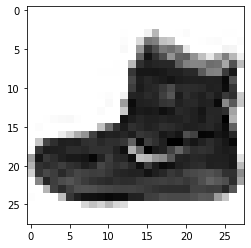

In [4]:
'''
Insert any number between 0 and 60k to visualise one training data
record. I put 0 for example. BUT TRY SOME OTHER:
'''
SAMPLE_RECORD_NUMBER = 0

sample = train_X[SAMPLE_RECORD_NUMBER]
plt.imshow(sample, cmap=plt.cm.binary)
plt.show()

In [5]:
'''
And the element in the position we plotted above should be the same as
the one we visually recognised in the image:
'''
print('The class label in position', SAMPLE_RECORD_NUMBER,'is:', train_y[SAMPLE_RECORD_NUMBER],
      '(',print_class_name(train_y[SAMPLE_RECORD_NUMBER]), ')')

# As we saw in the intro text above, 9 means "Ankle Boot". Makes sense.

The class label in position 0 is: 9 ( Ankle boot )


In [6]:
train_X.shape

(60000, 28, 28)

In [7]:
test_X.shape

(10000, 28, 28)

The sample number 45 has the class 2
** Pullover **
And this is the image:


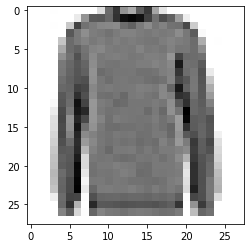

The sample number 534 has the class 7
** Sneaker **
And this is the image:


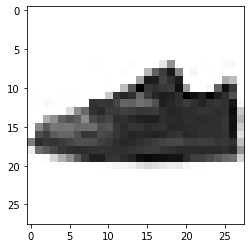

The sample number 6754 has the class 3
** Dress **
And this is the image:


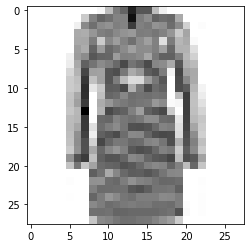

The sample number 34232 has the class 2
** Pullover **
And this is the image:


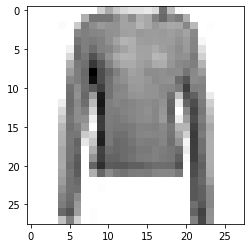

In [8]:
'''LET'S CHECK SOME MORE TRAINING SAMPLES: '''

CHECK_SAMPLES = [45, 534, 6754, 34232]

for s in CHECK_SAMPLES:
    print('The sample number', s, 'has the class', train_y[s])
    print('**',print_class_name(train_y[s]), '**')
    sample = train_X[s]
    plt.imshow(sample, cmap=plt.cm.binary)
    print('And this is the image:')
    plt.show()

In [9]:
# All of the training data are 8-bit unsigned integers (the values of each grayscale pixel)
train_X.dtype

dtype('uint8')

## We will process the data as in interactive activity from Week 3:

In [10]:
processed_train_X = train_X.reshape((60000, 28*28))
processed_train_X = processed_train_X.astype('float32') / 255

processed_test_X = test_X.reshape((10000, 28*28))
processed_test_X = processed_test_X.astype('float32') / 255

processed_train_y = to_categorical(train_y)
processed_test_y = to_categorical(test_y)

## Checking different optimisation algorithms:

* Vanilla SGD
* SGD with momentum
* SGD with Nesterov momentum
* RMSProp (default and tuning some parameters)
* Adam, AdaGrad, AdaDelta, AdaMax, Nadam and FTRL

We will run all of them in mini-batches of 512 samples and 50 epochs. 

**Note:** I encourage you to change some of the optimisers' parameters below to see how the performance is affected, as well as changing the number of samples and epochs for training.

In [11]:
# I will create a list of optimisers to make the code more concise, and then run them all

# All optimisers will use the same default parameter values, to do a fair comparison:
LEARNING_RATE = 0.01
MOMENTUM = 0.9
RHO = 0.9
EPSILON = 1e-07


vanilla_sgd = optimizers.SGD(
    learning_rate=LEARNING_RATE
)
sgd_momentum = optimizers.SGD(
    learning_rate=LEARNING_RATE, momentum=MOMENTUM
)
sgd_nesterov = optimizers.SGD(
    learning_rate=LEARNING_RATE, momentum=MOMENTUM, nesterov=True
)
rmsprop = optimizers.RMSprop(
    learning_rate=LEARNING_RATE, rho=RHO, momentum=0.0, epsilon=EPSILON, centered=False
)
rmsprop_momentum = optimizers.RMSprop(
    learning_rate=LEARNING_RATE, rho=RHO, momentum=MOMENTUM, epsilon=EPSILON, centered=False
)
adam = optimizers.Adam(
    learning_rate=LEARNING_RATE, beta_1=0.9, beta_2=0.999, epsilon=EPSILON, amsgrad=False
)
adadelta = optimizers.Adadelta(
    learning_rate=LEARNING_RATE, rho=RHO, epsilon=EPSILON
)
adagrad = optimizers.Adagrad(
    learning_rate=LEARNING_RATE, initial_accumulator_value=0.1, epsilon=EPSILON
)
adamax = optimizers.Adamax(
    learning_rate=LEARNING_RATE, beta_1=0.9, beta_2=0.999, epsilon=EPSILON
)
nadam = optimizers.Nadam(
    learning_rate=LEARNING_RATE, beta_1=0.9, beta_2=0.999, epsilon=EPSILON
)
ftrl = optimizers.Ftrl(
    learning_rate=0.01,
    learning_rate_power=-0.5,
    initial_accumulator_value=0.1,
    l1_regularization_strength=0.0,
    l2_regularization_strength=0.0,
    l2_shrinkage_regularization_strength=0.0,
)

optimisers = [vanilla_sgd, sgd_momentum, sgd_nesterov, rmsprop, rmsprop_momentum,
             adam, adadelta, adagrad, adamax, nadam, ftrl]

optimisers_names = [
    'Vanilla SGD', 'SGD Momentum', 'SGD Nesterov', 'RMSprop', 'RMSprop Momentum', 
    'Adam', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl'
]

optimisers = {
    name: optimiser for name, optimiser in zip(optimisers_names, optimisers)
}

## Now we will create the same Deep Learning model structure 

To fairly compare all of the optimisers

In [12]:
def create_model(optimiser):
    model = models.Sequential()
    model.add(layers.Input(shape=(processed_train_X.shape[1],)))
    model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(
        optimizer=optimiser, 
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

## The next code cell will take a good while to run. 
## Remove some optimisers from the list above if you want

In [13]:
EPOCHS=50
MINI_BATCH=512
VALIDATION_PERC=0.2
histories = {}

for optimiser_name in optimisers:
    start = perf_counter()
    print('Fitting model with optimiser: ', optimiser_name)
    model = create_model(optimisers[optimiser_name])
    history = model.fit(processed_train_X, processed_train_y, 
                        epochs=EPOCHS, 
                        batch_size=MINI_BATCH, 
                        validation_split=VALIDATION_PERC, 
                        verbose=0
                       )
    print(' - It took:', round(perf_counter()-start, 2),'seconds')
    histories[optimiser_name] = history.history

Fitting model with optimiser:  Vanilla SGD
 - It took: 54.69 seconds
Fitting model with optimiser:  SGD Momentum
 - It took: 55.38 seconds
Fitting model with optimiser:  SGD Nesterov
 - It took: 55.8 seconds
Fitting model with optimiser:  RMSprop
 - It took: 93.03 seconds
Fitting model with optimiser:  RMSprop Momentum
 - It took: 66.05 seconds
Fitting model with optimiser:  Adam
 - It took: 58.96 seconds
Fitting model with optimiser:  Adadelta
 - It took: 59.64 seconds
Fitting model with optimiser:  Adagrad
 - It took: 58.96 seconds
Fitting model with optimiser:  Adamax
 - It took: 68.77 seconds
Fitting model with optimiser:  Nadam
 - It took: 96.56 seconds
Fitting model with optimiser:  Ftrl
 - It took: 79.11 seconds


In [14]:
epochs = range(0, EPOCHS)

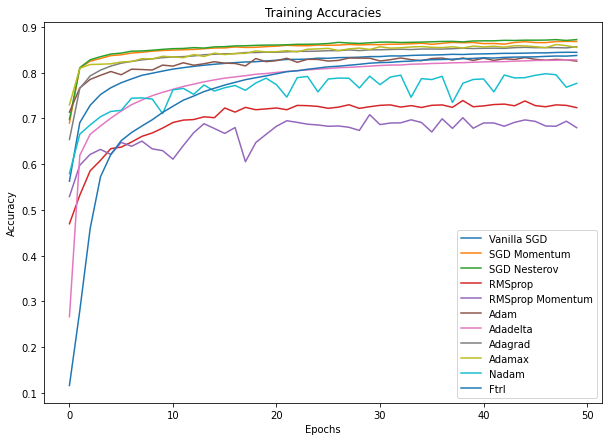

In [15]:
plt.figure(figsize=(10, 7))
for h in histories:  
    plt.plot(epochs, histories[h]['accuracy'], label=h)
plt.title(f'Training Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

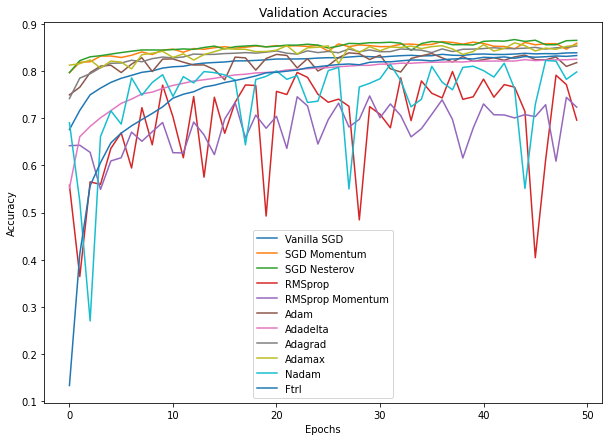

In [16]:
plt.figure(figsize=(10, 7))
for h in histories:  
    plt.plot(epochs, histories[h]['val_accuracy'], label=h)
plt.title(f'Validation Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In my execution, it seems like SGD with momentum and Nesterov as well as AdaMax are performing quite well in the validation set. The RMSProp versions seem quite unstable.

It might be that you can further improve SGD's tweaks, giving more or less weight to the momentum component for example...

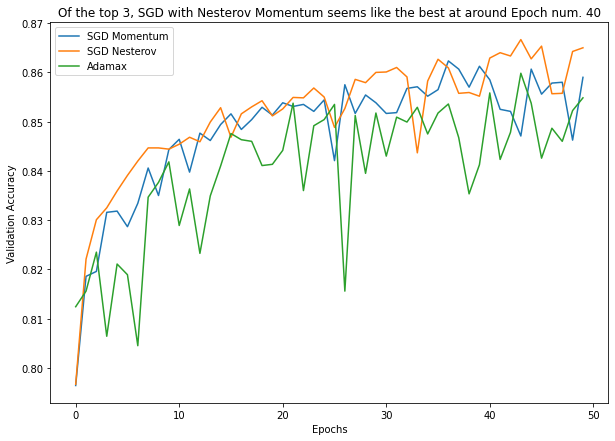

In [17]:
winning_optimisers = [
    'SGD Momentum', 'SGD Nesterov', 'Adamax',
]
plt.figure(figsize=(10, 7))
for h in winning_optimisers:  
    plt.plot(epochs, histories[h]['val_accuracy'], label=h)
plt.title(f'Of the top 3, SGD with Nesterov Momentum seems like the best at around Epoch num. 40')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

## Finally...

Let's create the final model with the winning configuration, evaluate it with the testing data and see some samples that are misclassified to see if they make sense (that in fact are not very clear examples): 

In [18]:
val_train_X = processed_train_X[:10000]
val_train_y = processed_train_y[:10000]
rem_train_X = processed_train_X[10000:]
rem_train_y = processed_train_y[10000:]


final_model = create_model(sgd_nesterov)
final_model.fit(rem_train_X, rem_train_y, 
          epochs=40, 
          batch_size=MINI_BATCH, 
          validation_data=(val_train_X, val_train_y), 
          verbose=2,
          shuffle=False,
         )

Epoch 1/40
98/98 - 2s - loss: 6.2393 - accuracy: 0.7079 - val_loss: 5.0019 - val_accuracy: 0.7974
Epoch 2/40
98/98 - 2s - loss: 4.2143 - accuracy: 0.8126 - val_loss: 3.5222 - val_accuracy: 0.8209
Epoch 3/40
98/98 - 1s - loss: 3.0005 - accuracy: 0.8268 - val_loss: 2.5435 - val_accuracy: 0.8318
Epoch 4/40
98/98 - 1s - loss: 2.1918 - accuracy: 0.8347 - val_loss: 1.8883 - val_accuracy: 0.8369
Epoch 5/40
98/98 - 1s - loss: 1.6490 - accuracy: 0.8389 - val_loss: 1.4476 - val_accuracy: 0.8394
Epoch 6/40
98/98 - 2s - loss: 1.2835 - accuracy: 0.8425 - val_loss: 1.1505 - val_accuracy: 0.8419
Epoch 7/40
98/98 - 2s - loss: 1.0366 - accuracy: 0.8449 - val_loss: 0.9496 - val_accuracy: 0.8426
Epoch 8/40
98/98 - 1s - loss: 0.8692 - accuracy: 0.8462 - val_loss: 0.8132 - val_accuracy: 0.8456
Epoch 9/40
98/98 - 2s - loss: 0.7554 - accuracy: 0.8482 - val_loss: 0.7202 - val_accuracy: 0.8475
Epoch 10/40
98/98 - 1s - loss: 0.6775 - accuracy: 0.8496 - val_loss: 0.6566 - val_accuracy: 0.8488
Epoch 11/40
98/98 -

In [19]:
test_loss, test_acc = final_model.evaluate(processed_test_X, processed_test_y)
print('Accuracy in the testing data:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.5036 - accuracy: 0.8454
Accuracy in the testing data: 0.8453999757766724


In [20]:
pred_classes = np.argmax(final_model.predict(processed_test_X), axis=-1) # Take the neuron with the highest softmax probability

test_classes = np.argmax(processed_test_y, axis=-1) # The same...

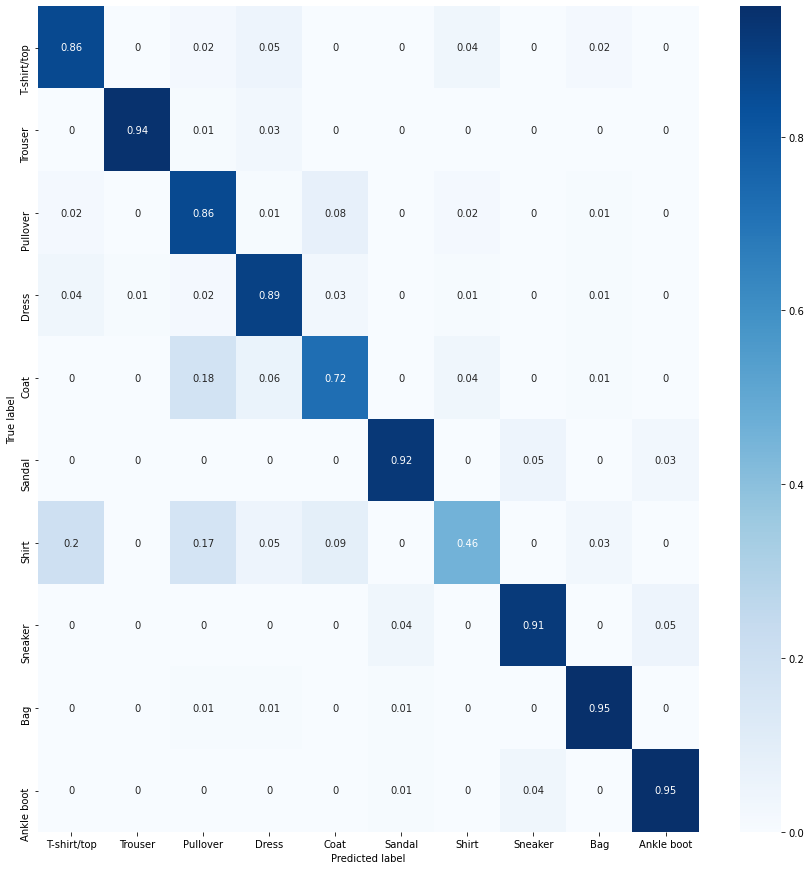

In [21]:
con_mat = tf.math.confusion_matrix(labels=test_classes, predictions=pred_classes).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

figure = plt.figure(figsize=(12, 12))
sns.heatmap(con_mat_norm, annot=True,cmap=plt.cm.Blues, yticklabels=class_names, xticklabels=class_names,)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Analysing confusion matrix

We can see that most errors make sense: Sandals are being confused with other shoes, and the worse performing class is Shirt, which is commonly being confused with t-shirt and pullover mainly. Also coats and pullovers are being confused quite a bit.

Trousers, Bags and Ankle Boots are consistenly being classified correctly.

## Misclassifications:

Finally let's have a look at some specific misclassifications.

The real class was Sneaker and we predicted Sandal
And this is the image:


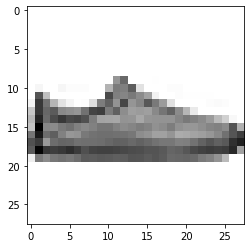

--------------------------------------------------
The real class was Coat and we predicted Pullover
And this is the image:


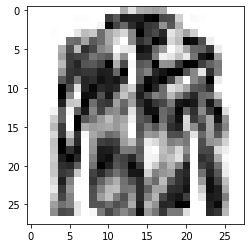

--------------------------------------------------


In [22]:
# Let's check some of the test samples we misclassified and see if they make sense:

MISCLASSIF_TO_CHECK = 2

index=0
misclassif_checked = 0

for r, p in zip(test_classes, pred_classes):
    if r!=p:
        misclassif_checked+=1
        print('The real class was', print_class_name(r), 'and we predicted',print_class_name(p))
        got_wrong = test_X[index]
        plt.imshow(got_wrong, cmap=plt.cm.binary)
        print('And this is the image:')
        plt.show()
        print('--------------------------------------------------')
    if misclassif_checked == MISCLASSIF_TO_CHECK:
        break
    index += 1

# Final remarks

Even though optimisers like RMSProp and Adam are commonly used as the default ones, SGD with some easy tweak is sometimes performing better, like in our case today.

When building your Deep Learning models in the real world, make sure to double check how other optimisers work too (probably more exhaustively than how we have done it today in this Interactive Activity). And also don't forget about Regularisers too!


# Learning Exercises

By **changing some optimisers' configurations**, can you achieve a better testing accuracy as my SGD with Nesterov Momentum run (with momentum=0.9)?

If you can't improve by tweaking optimisers, maybe you can try some **other Neural Network configuration** (more/less layers, more/less neurons),  and/or other **regularisation methods**.

Also, what happens when you **increase or decrease the batch_size** of the mini-batch algorithm? Any conclusive results?